# Gradient Boosting Tree from scratch

Dans ce notebook, vous allez coder votre propre algorithme de machine learning pour entraîner des modèles de Gradient Boosting Tree avec des arbres de décision afin de résoudre des problèmes de régression. 

Le code que vous trouverez dans ce notebook est fonctionnelle pour créer un algorithme d'apprentissage automatique. Attention, ce code n'est pas optimisé, il est uniquement écrit à but pédagogique pour que vous compreniez bien ce qui se passe lorsque vous entraînez un modèle. Je vais vous accompagner pas à pas dans l'implémentation de cet algorithme.

Si vous voulez entraîner un modèle à but professionnel, je vous recommande d'utiliser le package [Sklearn](https://scikit-learn.org/stable/index.html) qui contient toutes les librairies essentiel pour vous aider. 

Merci de soutenir ce travail de création de contenus en vous abonnant à la chaîne youtube AIForYou et en mettant une étoile au répertoire github. 

## Importation des packages

In [ ]:
# Packages de gestion des données
import numpy as np
import pandas as pd

# Packages de visualisation
import matplotlib.pyplot as plt

# Packages de modélisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Création du dataset des données

Le but de ce jeux de données est de prédire la variable y qui contient cinq distributions différentes en fonction d'une variable continue x. 

In [ ]:
# x est une variable continue de 0 à 100
x = np.arange(0,100)
x = pd.DataFrame({'x':x})

# y aura cinq distributions de données différentes
y1 = np.random.uniform(10,15,20)
y2 = np.random.uniform(20,25,20)
y3 = np.random.uniform(0,5,20)
y4 = np.random.uniform(30,32,20)
y5 = np.random.uniform(13,17,20)

# Intégration de la variable cible dans la base de données
x['y'] = np.concatenate((y1,y2,y3,y4,y5))

Représentation graphique du jeu de données.

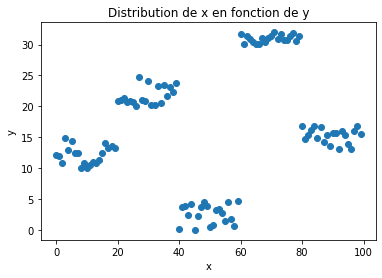

In [ ]:
plt.scatter(x['x'], x['y'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Distribution de x en fonction de y')
plt.show()

Création de notre jeu d'entraînement et de test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x['x'], x['y'], test_size=0.33, random_state=42)

Visualisation des deux jeux de données.

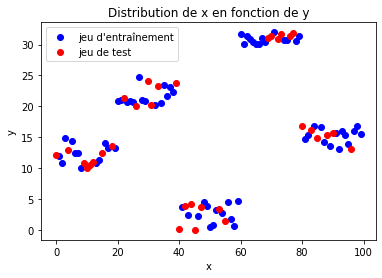

In [ ]:
plt.scatter(x_train, y_train, color='blue', label="jeu d'entraînement")
plt.scatter(x_test, y_test, color='red', label="jeu de test")
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Distribution de x en fonction de y')
plt.show()

## Gradient Boosting Tree (GBT)

### Création de la classe

In [ ]:
class GBTRegressor():
  def __init__(self, n_estimators=100, max_depth=1, random_state=None, 
               learning_rate=1.0, subsample=1, criterion='mse', splitter='best', 
               min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, 
               min_impurity_decrease=0, ccp_alpha=0):
    self._n_estimators = n_estimators
    self._max_depth = max_depth
    self._random_state = random_state
    self._learning_rate = learning_rate
    self._subsample = subsample
    self._criterion = criterion
    self._splitter = splitter
    self._min_samples_split = min_samples_split
    self._min_samples_leaf = min_samples_leaf
    self._max_leaf_nodes = max_leaf_nodes
    self._min_impurity_decrease = min_impurity_decrease
    self._ccp_alpha = ccp_alpha
    self._model = dict()

In [ ]:
gbt = GBTRegressor(n_estimators=20, random_state=123)
print(gbt._n_estimators)
print(gbt._random_state)

20
123


### Fonction d'entraînement

In [ ]:
class GBTRegressor():
  def __init__(self, n_estimators=100, max_depth=1, random_state=None, 
               learning_rate=1.0, subsample=1, criterion='mse', splitter='best', 
               min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, 
               min_impurity_decrease=0, ccp_alpha=0):
    self._n_estimators = n_estimators
    self._max_depth = max_depth
    self._random_state = random_state
    self._learning_rate = learning_rate
    self._subsample = subsample
    self._criterion = criterion
    self._splitter = splitter
    self._min_samples_split = min_samples_split
    self._min_samples_leaf = min_samples_leaf
    self._max_leaf_nodes = max_leaf_nodes
    self._min_impurity_decrease = min_impurity_decrease
    self._ccp_alpha = ccp_alpha
    self._model = dict()

  def fit(self, x, y):

    # Mettre les x dans la dimension adéquat (100, 1) plutôt que (100,)
    x = np.array(x).reshape(-1, 1)

    # Création du premier estimateur, une feuille qui contient la moyenne de la variable à prédire
    self._model[0] = np.mean(y)

    # Calcul des résidus
    self._residual = y - self._model[0]

    # Entraînement des arbres de la forêt
    for i in range(1, self._n_estimators+1) :

      # Initialiser le modèle d'arbre de décision
      estimator = DecisionTreeRegressor(max_depth=self._max_depth, 
                                             random_state=self._random_state, 
                                             criterion=self._criterion,
                                             splitter=self._splitter,
                                             min_samples_split=self._min_samples_split,
                                             min_samples_leaf=self._min_samples_leaf,
                                             max_leaf_nodes=self._max_leaf_nodes,
                                             min_impurity_decrease=self._min_impurity_decrease,
                                             ccp_alpha=self._ccp_alpha)
      
      # Entraîner le modèle sur les résidus
      self._model[i] = estimator.fit(x, self._residual)

      # Prédire la prédiction de la forêt actuel
      pred_tree = self._model[0] + self._learning_rate * np.sum([ self._model[j].predict(x) for j in range(1, i+1)], axis=0)

      # Calculer les nouveaux résidus
      self._residual =  y - pred_tree


In [ ]:
gbt = GBTRegressor(n_estimators=20, random_state=123, learning_rate=0.2, max_depth=3)
print(gbt._n_estimators)
print(gbt._max_depth)
print(gbt._random_state)

20
3
123


In [ ]:
gbt.fit(x_train, y_train)
gbt._model

{0: 16.90876382734491,
 1: DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'),
 2: DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'),
 3: DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_dec

### Visualiser l'entraînement du Gradient Boosting Tree 

In [ ]:
class GBTRegressor():
  def __init__(self, n_estimators=100, max_depth=1, random_state=None, 
               learning_rate=1.0, subsample=1, criterion='mse', splitter='best', 
               min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, 
               min_impurity_decrease=0, ccp_alpha=0):
    self._n_estimators = n_estimators
    self._max_depth = max_depth
    self._random_state = random_state
    self._learning_rate = learning_rate
    self._subsample = subsample
    self._criterion = criterion
    self._splitter = splitter
    self._min_samples_split = min_samples_split
    self._min_samples_leaf = min_samples_leaf
    self._max_leaf_nodes = max_leaf_nodes
    self._min_impurity_decrease = min_impurity_decrease
    self._ccp_alpha = ccp_alpha
    self._model = dict()

  def fit(self, x, y):

    # Mettre les x dans la dimension adéquat (100, 1) plutôt que (100,)
    x = np.array(x).reshape(-1, 1)

    # Création du premier estimateur, une feuille qui contient la moyenne de la variable à prédire
    self._model[0] = np.mean(y)

    # Calcul des résidus
    self._residual = y - self._model[0]

    # Entraînement des arbres de la forêt
    for i in range(1, self._n_estimators+1) :

      # Initialiser le modèle d'arbre de décision
      estimator = DecisionTreeRegressor(max_depth=self._max_depth, 
                                             random_state=self._random_state, 
                                             criterion=self._criterion,
                                             splitter=self._splitter,
                                             min_samples_split=self._min_samples_split,
                                             min_samples_leaf=self._min_samples_leaf,
                                             max_leaf_nodes=self._max_leaf_nodes,
                                             min_impurity_decrease=self._min_impurity_decrease,
                                             ccp_alpha=self._ccp_alpha)
      
      # Entraîner le modèle sur les résidus
      self._model[i] = estimator.fit(x, self._residual)

      # Prédire la prédiction de la forêt actuel
      pred_tree = np.array([ self._model[j].predict(x) for j in range(1, i+1)])

      # Calculer les nouveaux résidus
      self._residual =  y - self._model[0] - self._learning_rate * np.sum(pred_tree, axis=0)


  def fit_visualization(self, x, y):

    x = np.array(x).reshape(-1, 1)

    # Création du premier estimateur, une feuille qui contient la moyenne de la variable à prédire
    self._model[0] = np.mean(y)

    # Calcul des résidus
    self._residual = y - self._model[0]

    # Visualization du modèle feuille
    x_test = np.arange(0,100).reshape(-1, 1)
    plt.scatter(x_train, y_train)
    pred = np.full(100, self._model[0])
    plt.plot(x_test, pred, color='red')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title('Prédiction de la forêt pour estimer y')
    plt.show()

    # Entraînement des arbres de la forêt
    for i in range(1, self._n_estimators+1) :

      # Initialiser le modèle d'arbre de décision
      estimator = DecisionTreeRegressor(max_depth=self._max_depth, 
                                             random_state=self._random_state, 
                                             criterion=self._criterion,
                                             splitter=self._splitter,
                                             min_samples_split=self._min_samples_split,
                                             min_samples_leaf=self._min_samples_leaf,
                                             max_leaf_nodes=self._max_leaf_nodes,
                                             min_impurity_decrease=self._min_impurity_decrease,
                                             ccp_alpha=self._ccp_alpha)
      # Entraîner le modèle sur les résidus
      self._model[i] = estimator.fit(x, self._residual)

      # Visualisation du nouvel arbre sur les résidus
      plt.scatter(x_train, self._residual, color='green')
      pred = self._model[i].predict(x_test)
      plt.plot(x_test, pred, color='red')
      plt.ylabel('y')
      plt.xlabel('x')
      plt.title('Prédiction du nouvel arbre pour estimer les résidus')
      plt.show()

      # Prédire la prédiction de la forêt actuel
      pred_tree = np.array([ self._model[j].predict(x) for j in range(1, i+1)])

      # Calculer les nouveaux résidus
      self._residual =  y - self._model[0] - self._learning_rate * np.sum(pred_tree, axis=0)

    # Visualisation du modèle actuel
      plt.scatter(x_train, y_train)
      pred = np.full(100, self._model[0]) + self._learning_rate * np.sum([ self._model[j].predict(x_test) for j in range(1, i+1) ], axis=0)
      plt.plot(x_test, pred, color='red')
      plt.ylabel('y')
      plt.xlabel('x')
      plt.title('Prédiction de la forêt pour estimer y')
      plt.show()

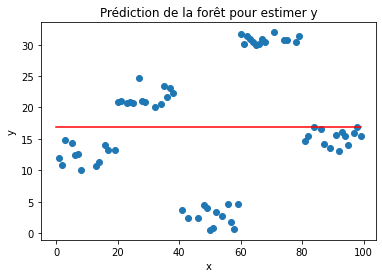

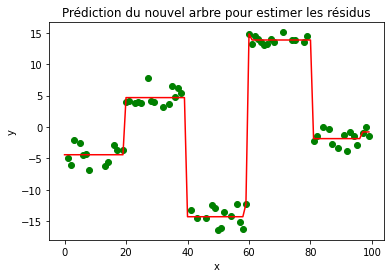

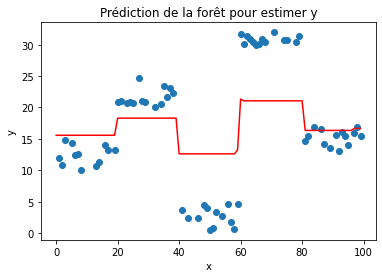

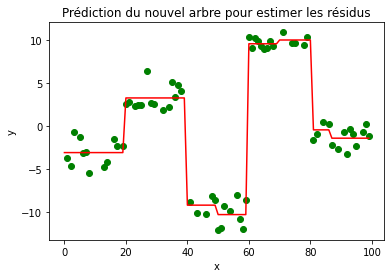

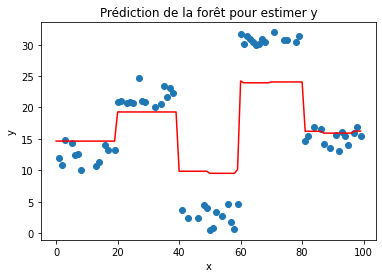

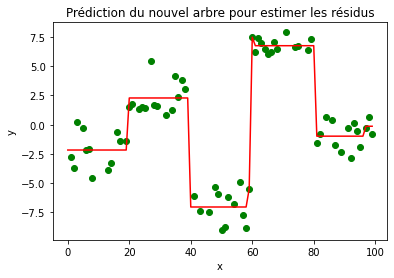

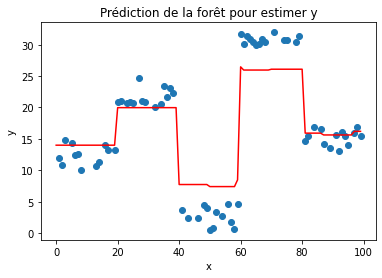

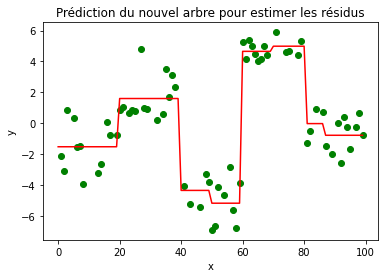

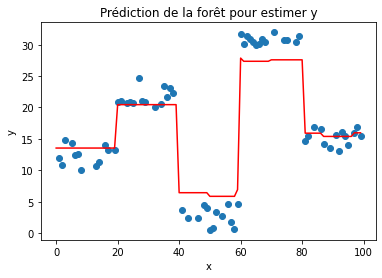

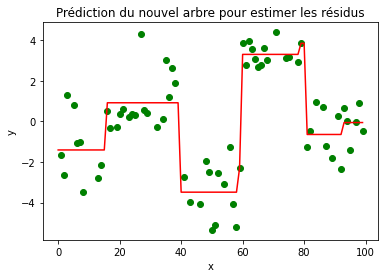

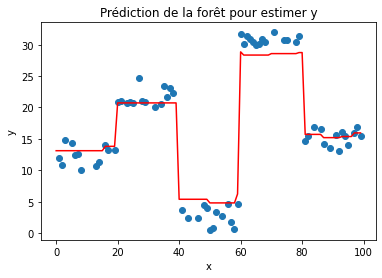

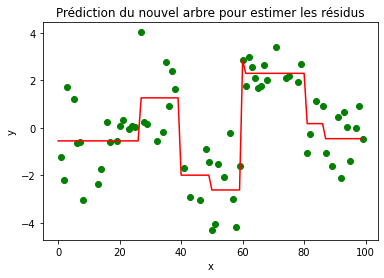

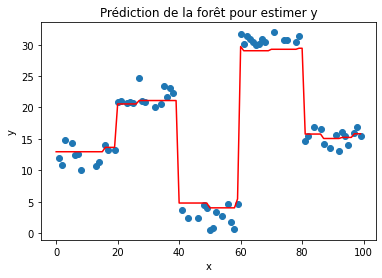

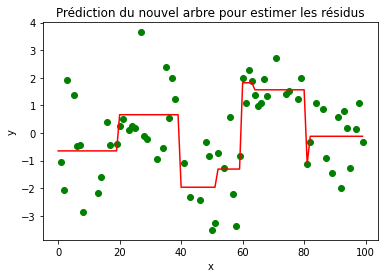

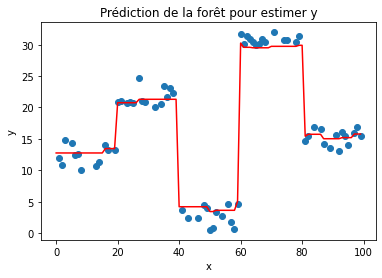

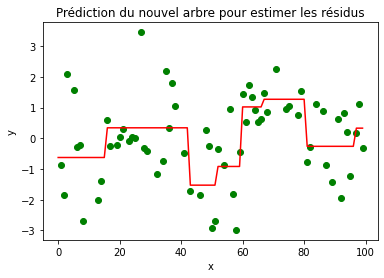

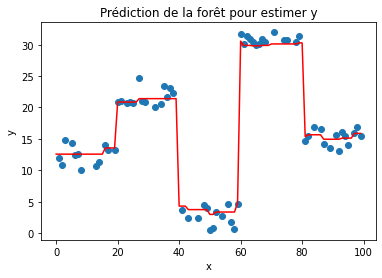

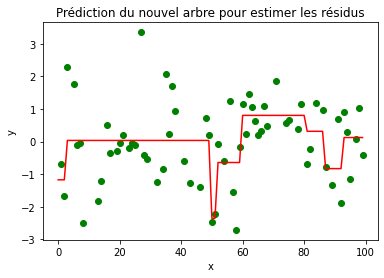

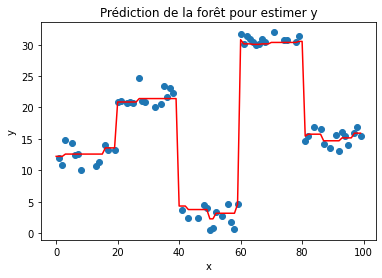

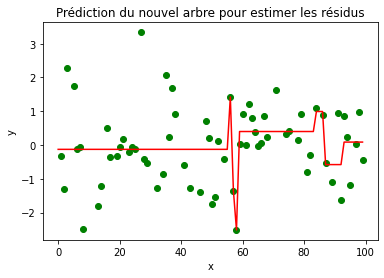

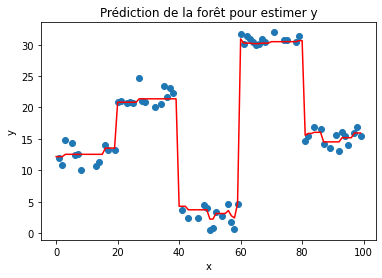

In [ ]:
gbt = GBTRegressor(n_estimators=10, random_state=123, learning_rate=0.3, max_depth=3)
gbt.fit_visualization(x_train, y_train)

On peut rapidement tomber dans l'overfiting sans learning rate ou avec des arbres trop profonds.

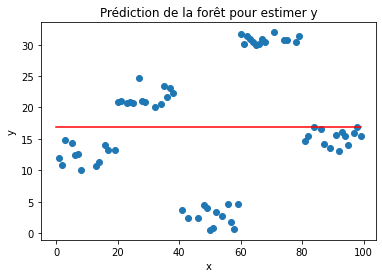

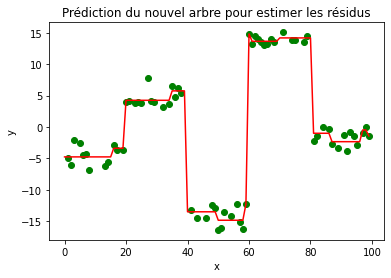

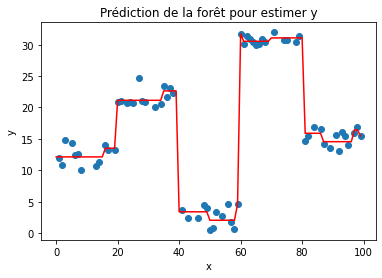

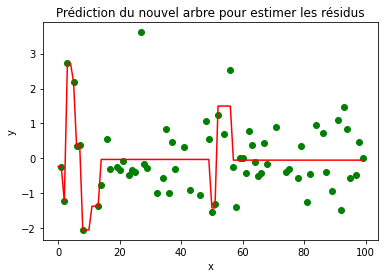

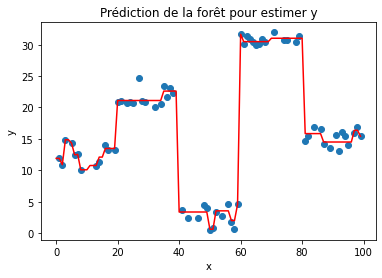

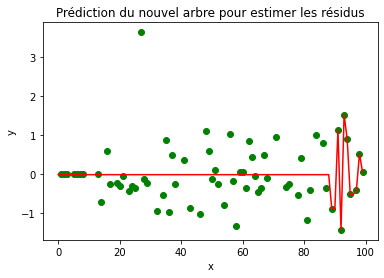

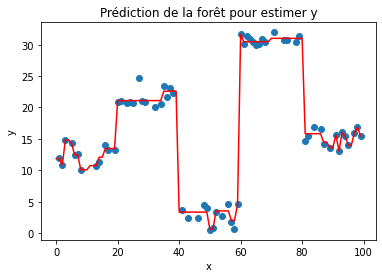

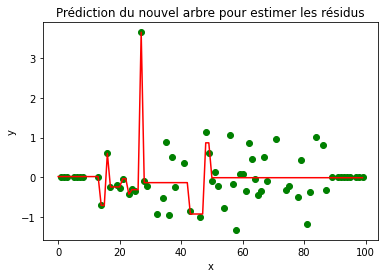

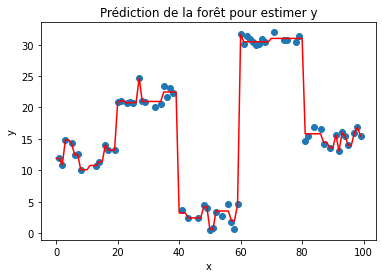

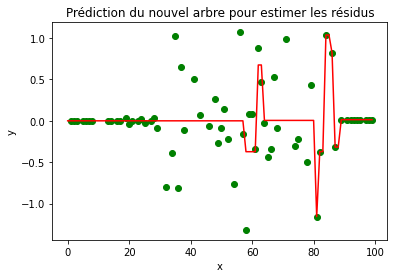

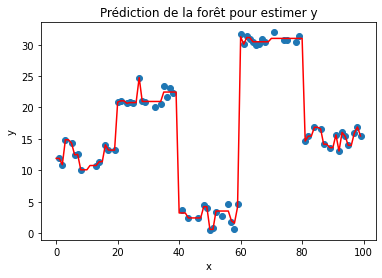

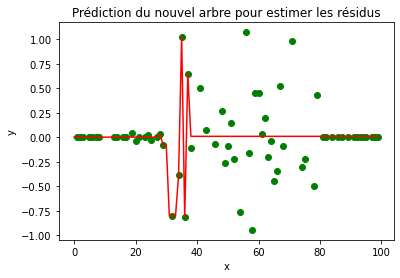

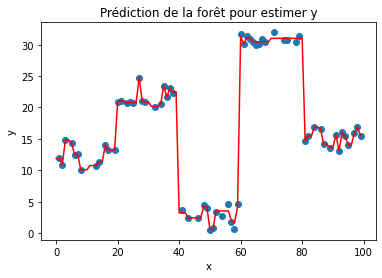

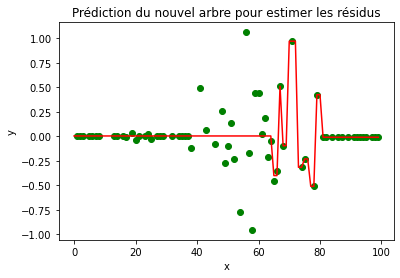

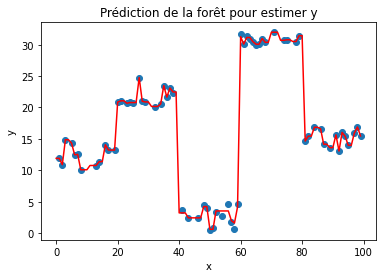

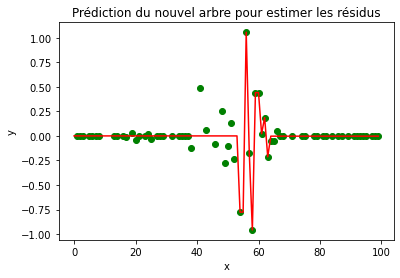

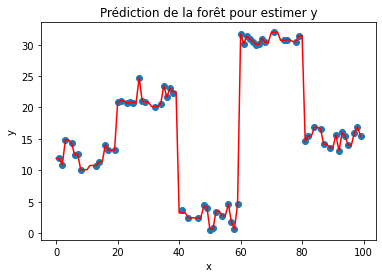

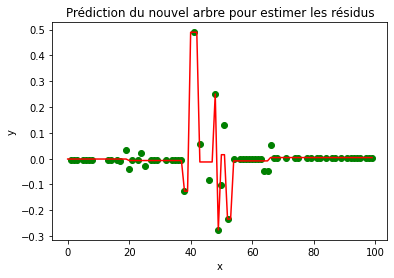

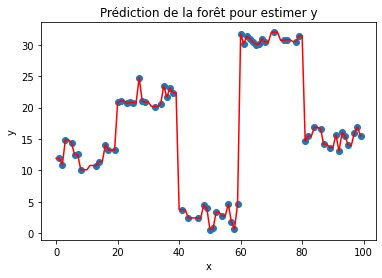

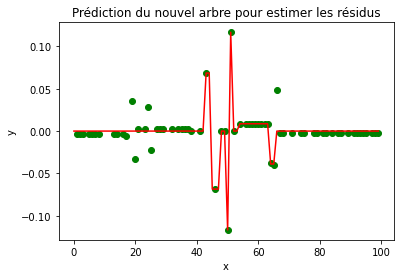

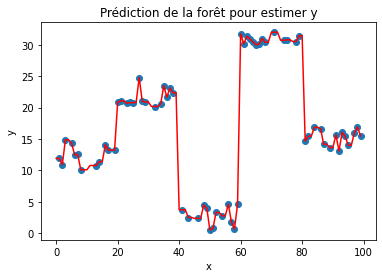

In [ ]:
gbt = GBTRegressor(n_estimators=10, random_state=123, learning_rate=1, max_depth=4)
gbt.fit_visualization(x_train, y_train)

### Fonction de prédiction

In [ ]:
class GBTRegressor():
  def __init__(self, n_estimators=100, max_depth=1, random_state=None, 
               learning_rate=1.0, subsample=1, criterion='mse', splitter='best', 
               min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, 
               min_impurity_decrease=0, ccp_alpha=0):
    self._n_estimators = n_estimators
    self._max_depth = max_depth
    self._random_state = random_state
    self._learning_rate = learning_rate
    self._subsample = subsample
    self._criterion = criterion
    self._splitter = splitter
    self._min_samples_split = min_samples_split
    self._min_samples_leaf = min_samples_leaf
    self._max_leaf_nodes = max_leaf_nodes
    self._min_impurity_decrease = min_impurity_decrease
    self._ccp_alpha = ccp_alpha
    self._model = dict()


  def fit(self, x, y):

    # Mettre les x dans la dimension adéquat (100, 1) plutôt que (100,)
    x = np.array(x).reshape(-1, 1)

    # Création du premier estimateur, une feuille qui contient la moyenne de la variable à prédire
    self._model[0] = np.mean(y)

    # Calcul des résidus
    self._residual = y - self._model[0]

    # Entraînement des arbres de la forêt
    for i in range(1, self._n_estimators+1) :

      # Initialiser le modèle d'arbre de décision
      estimator = DecisionTreeRegressor(max_depth=self._max_depth, 
                                             random_state=self._random_state, 
                                             criterion=self._criterion,
                                             splitter=self._splitter,
                                             min_samples_split=self._min_samples_split,
                                             min_samples_leaf=self._min_samples_leaf,
                                             max_leaf_nodes=self._max_leaf_nodes,
                                             min_impurity_decrease=self._min_impurity_decrease,
                                             ccp_alpha=self._ccp_alpha)
      
      # Entraîner le modèle sur les résidus
      self._model[i] = estimator.fit(x, self._residual)

      # Prédire la prédiction de la forêt actuel
      pred_tree = np.array([ self._model[j].predict(x) for j in range(1, i+1)])

      # Calculer les nouveaux résidus
      self._residual =  y - self._model[0] - self._learning_rate * np.sum(pred_tree, axis=0)


  def fit_visualization(self, x, y):

    x = np.array(x).reshape(-1, 1)

    # Création du premier estimateur, une feuille qui contient la moyenne de la variable à prédire
    self._model[0] = np.mean(y)

    # Calcul des résidus
    self._residual = y - self._model[0]

    # Visualization du modèle feuille
    x_test = np.arange(0,100).reshape(-1, 1)
    plt.scatter(x_train, y_train)
    pred = np.full(100, self._model[0])
    plt.plot(x_test, pred, color='red')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title('Prédiction de la forêt pour estimer y')
    plt.show()

    # Entraînement des arbres de la forêt
    for i in range(1, self._n_estimators+1) :

      # Initialiser le modèle d'arbre de décision
      estimator = DecisionTreeRegressor(max_depth=self._max_depth, 
                                             random_state=self._random_state, 
                                             criterion=self._criterion,
                                             splitter=self._splitter,
                                             min_samples_split=self._min_samples_split,
                                             min_samples_leaf=self._min_samples_leaf,
                                             max_leaf_nodes=self._max_leaf_nodes,
                                             min_impurity_decrease=self._min_impurity_decrease,
                                             ccp_alpha=self._ccp_alpha)
      # Entraîner le modèle sur les résidus
      self._model[i] = estimator.fit(x, self._residual)

      # Visualisation du nouvel arbre sur les résidus
      plt.scatter(x_train, self._residual, color='green')
      pred = self._model[i].predict(x_test)
      plt.plot(x_test, pred, color='red')
      plt.ylabel('y')
      plt.xlabel('x')
      plt.title('Prédiction du nouvel arbre pour estimer les résidus')
      plt.show()

      # Prédire la prédiction de la forêt actuel
      pred_tree = np.array([ self._model[j].predict(x) for j in range(1, i+1)])

      # Calculer les nouveaux résidus
      self._residual =  y - self._model[0] - self._learning_rate * np.sum(pred_tree, axis=0)

    # Visualization du modèle actuel
      plt.scatter(x_train, y_train)
      pred = np.full(100, self._model[0]) + self._learning_rate * np.sum([ self._model[j].predict(x_test) for j in range(1, i+1) ], axis=0)
      plt.plot(x_test, pred, color='red')
      plt.ylabel('y')
      plt.xlabel('x')
      plt.title('Prédiction de la forêt pour estimer y')
      plt.show()

  def predict(self, x):

    x = np.array(x).reshape(-1, 1)

    pred = self._model[0] + self._learning_rate * np.sum([ self._model[j].predict(x) for j in range(1, self._n_estimators+1) ], axis=0)

    return pred

In [ ]:
gbt = GBTRegressor(n_estimators=20, random_state=123, learning_rate=0.2, max_depth=3)

gbt.fit(x_train, y_train)



0.6752412726766783


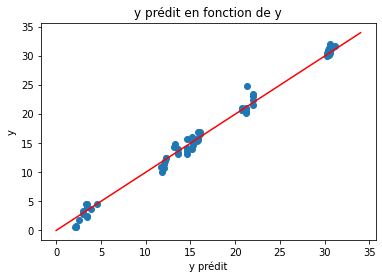

In [ ]:
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

plt.scatter(y_train_pred, y_train)
plt.plot(np.arange(0, 35), np.arange(0, 35), color='red')
plt.ylabel('y')
plt.xlabel('y prédit')
plt.title('y prédit en fonction de y')
plt.show()

1.4968947397633927


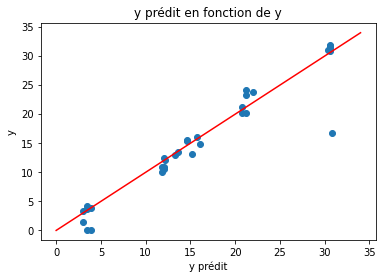

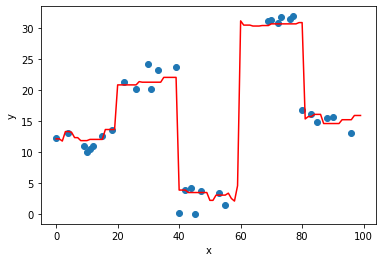

In [ ]:
y_test_pred = gbt.predict(x_test)

print(mean_absolute_error(y_test_pred, y_test))

plt.scatter(y_test_pred, y_test)
plt.plot(np.arange(0, 35), np.arange(0, 35), color='red')
plt.ylabel('y')
plt.xlabel('y prédit')
plt.title('y prédit en fonction de y')
plt.show()

x_line = np.arange(0, 100).reshape(-1, 1)
y_line = gbt.predict(x_line)

plt.scatter(x_test, y_test)
plt.plot(x_line, y_line, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

# Références 

[Gradient Boosting from scratch](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)

[Gradient Boosting Classification from Scratch](https://ericwebsmith.github.io/2020/04/19/GradientBoostingClassification/)

[Gradient Boosting in Python from Scratch](https://towardsdatascience.com/gradient-boosting-in-python-from-scratch-4a3d9077367)

[Understanding gradient boosting from scratch with a small dataset](https://towardsdatascience.com/understanding-gradient-boosting-from-scratch-with-small-dataset-587592cc871f)

[Gradient Boost Part 2 (of 4): Regression Details](https://www.youtube.com/watch?v=2xudPOBz-vs)